In [1]:
# %load Dependecies.py
import json
import numpy as np
import pandas as pd

import config
import tweepy
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_token_secret)
api = tweepy.API(auth)

In [3]:
def analyze_tweet(tweet):
    tweet = tweet._json
    #  Run Vader Analysis on each tweet
    score = analyzer.polarity_scores(tweet["text"])
    return score

In [4]:
# %load analyse_tweeter.py

def analyse_tweeter(user_handle):
    # latest tweet_id
    largest_id = 0

    # Counter
    counter = 1
    
    while counter < 100 :
       # Loop through 5 pages of tweets (total 100 tweets)
        for page in tweepy.Cursor(api.search, q=target_term, max_id=largest_id, count = 25).pages(4):

            if not largest_id:
                largest_id = page[0].id
            if counter < 100 :
                # Loop through all tweets
                for tweet in page:
                # Run Vader Analysis on each tweet
                    score = analyze_tweet(tweet)
                    tweets_ago = counter

                    # Add sentiments for each tweet into an array
                    sentiments.append({ "Source": user_handle,
                                       "Tweet Text": tweet.text,
                                       "Tweet Date" : tweet.created_at,
                                       "Compound": score["compound"],
                                       "Positive": score["pos"],
                                       "Negative": score["neg"],
                                       "Neutral": score["neg"],
                                       "Tweets Ago": counter})
                                       
                    # Add to counter 
                    counter = counter + 1


    return sentiments

In [5]:

# Target Account# Targe 
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")
sentiments = []

for target_term in target_users:
    sentiments = analyse_tweeter(target_term)
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)

In [6]:
sentiments_pd.head()

,Compound,Negative,Neutral,Positive,Source,Tweet Date,Tweet Text,Tweets Ago
0,0.0000,0.000,0.000,0.000,@BBC,2018-06-08 20:49:16,@localnotail @TheStephenRalph @afneil @bbcthis...,1
1,0.0000,0.000,0.000,0.000,@BBC,2018-06-08 20:49:04,turkish police and students @ZDF @BBC @VOXde ...,2
2,0.8271,0.000,0.000,0.293,@BBC,2018-06-08 20:48:59,RT @NijaActivist: Finally this Sars Guy got to...,3
3,0.8658,0.000,0.000,0.373,@BBC,2018-06-08 20:48:58,RT @mr_chambers_: Dear @BBC #TraceyBreaksTheNe...,4
4,-0.6783,0.358,0.358,0.000,@BBC,2018-06-08 20:48:50,RT @destayo67: @NijaActivist @segalink @BBCBre...,5


In [7]:

# save data to CSV# save  
sentiments_pd.to_csv("NewsMood.csv", encoding="UTF-8")

In [8]:
# Save data to Excel
sentiments_pd.to_excel("NewsMood.xlsx", encoding="UTF-8")


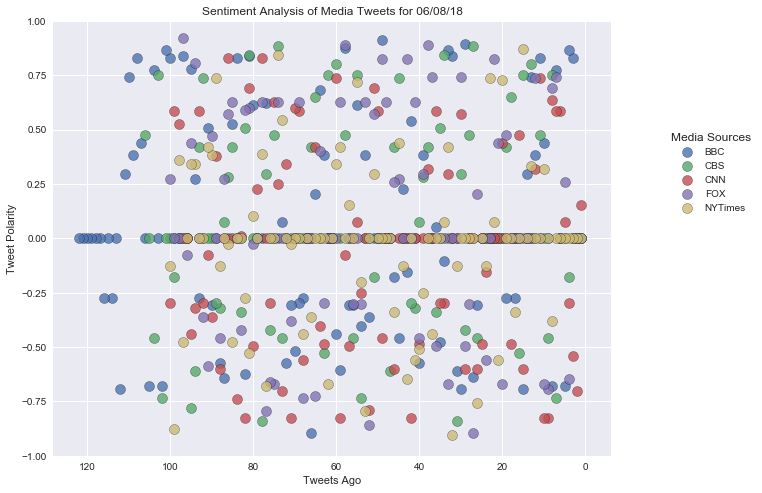

In [9]:
plt.figure(figsize=(10,8))
sns.set()
plt.gca().invert_xaxis()

handle1 = plt.scatter(sentiments_pd[sentiments_pd["Source"]=="@BBC"]["Tweets Ago"], 
                      sentiments_pd[sentiments_pd["Source"]=="@BBC"]["Compound"], 
                      s = 100,alpha = 0.8, marker="o",edgecolors="black",label = "BBC")

handle2 = plt.scatter(sentiments_pd[sentiments_pd["Source"]=="@CBS"]["Tweets Ago"], 
                      sentiments_pd[sentiments_pd["Source"]=="@CBS"]["Compound"], 
                      s = 100,alpha = 0.8, marker="o",edgecolors="black",label = "CBS")

handle3 = plt.scatter(sentiments_pd[sentiments_pd["Source"]=="@CNN"]["Tweets Ago"], 
                      sentiments_pd[sentiments_pd["Source"]=="@CNN"]["Compound"], 
                      s = 100,alpha = 0.8, marker="o",edgecolors="black",label = "CNN")

handle4 = plt.scatter(sentiments_pd[sentiments_pd["Source"]=="@FoxNews"]["Tweets Ago"], 
                      sentiments_pd[sentiments_pd["Source"]=="@FoxNews"]["Compound"], 
                      s = 100,alpha = 0.8, marker="o",edgecolors="black",label = "FOX")

handle5 = plt.scatter(sentiments_pd[sentiments_pd["Source"]=="@nytimes"]["Tweets Ago"], 
                      sentiments_pd[sentiments_pd["Source"]=="@nytimes"]["Compound"], 
                      s = 100,alpha = 0.8, marker="o",edgecolors="black",label = "NYTimes")


lgnd = plt.legend(handles= [handle1, handle2, handle3, handle4, handle5], loc=(1.1, 0.55), title= 'Media Sources')

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets for %s" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.ylim(-1, 1)

plt.show()

In [10]:
sentiments_grp = sentiments_pd.groupby("Source")
aggr_comp_sentiments = sentiments_grp["Compound"].mean()
aggr_comp_sentiments

Source
@BBC        0.057143
@CBS        0.059143
@CNN       -0.038755
@FoxNews    0.068202
@nytimes   -0.017717
Name: Compound, dtype: float64

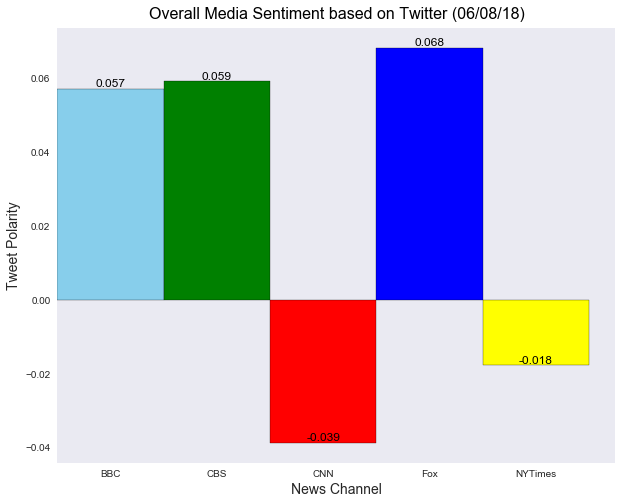

In [11]:
sns.set_style("dark") # grid off by default in seaborn

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

# Splice the data between different news channels
fig, ax = plt.subplots(figsize=(10,8))
ticks_loc = np.arange(len(aggr_comp_sentiments))
width = 1
rectsBBC = ax.bar(ticks_loc[0], aggr_comp_sentiments[0], width, color='skyblue', edgecolor = 'black')
rectsCBS = ax.bar(ticks_loc[1], aggr_comp_sentiments[1], width, color='green', edgecolor = 'black')
rectsCNN = ax.bar(ticks_loc[2], aggr_comp_sentiments[2], width, color='red', edgecolor = 'black')
rectsFOX = ax.bar(ticks_loc[3], aggr_comp_sentiments[3], width, color='blue', edgecolor = 'black')
rectsNYT = ax.bar(ticks_loc[4], aggr_comp_sentiments[4], width, color='yellow', edgecolor = 'black')

# Set labels, tick marks, and axis limits.
ax.set_title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%x")), **title_font)
ax.set_xlabel("News Channel", **axis_font)
ax.set_ylabel("Tweet Polarity", **axis_font)
ax.set_xticks(ticks_loc)
ax.set_xticklabels(('BBC', 'CBS', 'CNN', 'Fox', 'NYTimes'))
ax.set_xlim(-0.5)

# Use functions to label the polarity bars
def autolabel(rects, value):
    for rect in rects:
        height = float(rect.get_height())
        ax.text(rect.get_x() + rect.get_width()/2, height,
                                value,
                ha='center', va='bottom', color="black")

# Call functions to implement the function calls
autolabel(rectsBBC,round(aggr_comp_sentiments[0],3) )
autolabel(rectsCBS,round(aggr_comp_sentiments[1],3))
autolabel(rectsCNN, round(aggr_comp_sentiments[2],3))
autolabel(rectsFOX,round(aggr_comp_sentiments[3],3))
autolabel(rectsNYT,round(aggr_comp_sentiments[4],3))


# Show the Figure
plt.show()